In [1]:
import scipy.integrate as integrate
from numpy import sqrt, sin, cos, pi,arccos,arctan
import math

import requests
from bs4 import BeautifulSoup
import itertools
from matplotlib.patches import RegularPolygon
from IPython.display import Markdown, display,Image,HTML

November 2024 : Puzzle Show Solution Two random points, one red and one blue, are chosen uniformly and independently from the interior of a square. To ten decimal places 1 , what is the probability that there exists a point on the side of the square closest to the blue point that is equidistant to both the blue point and the red point? (Or, if you want to send in the exact answer

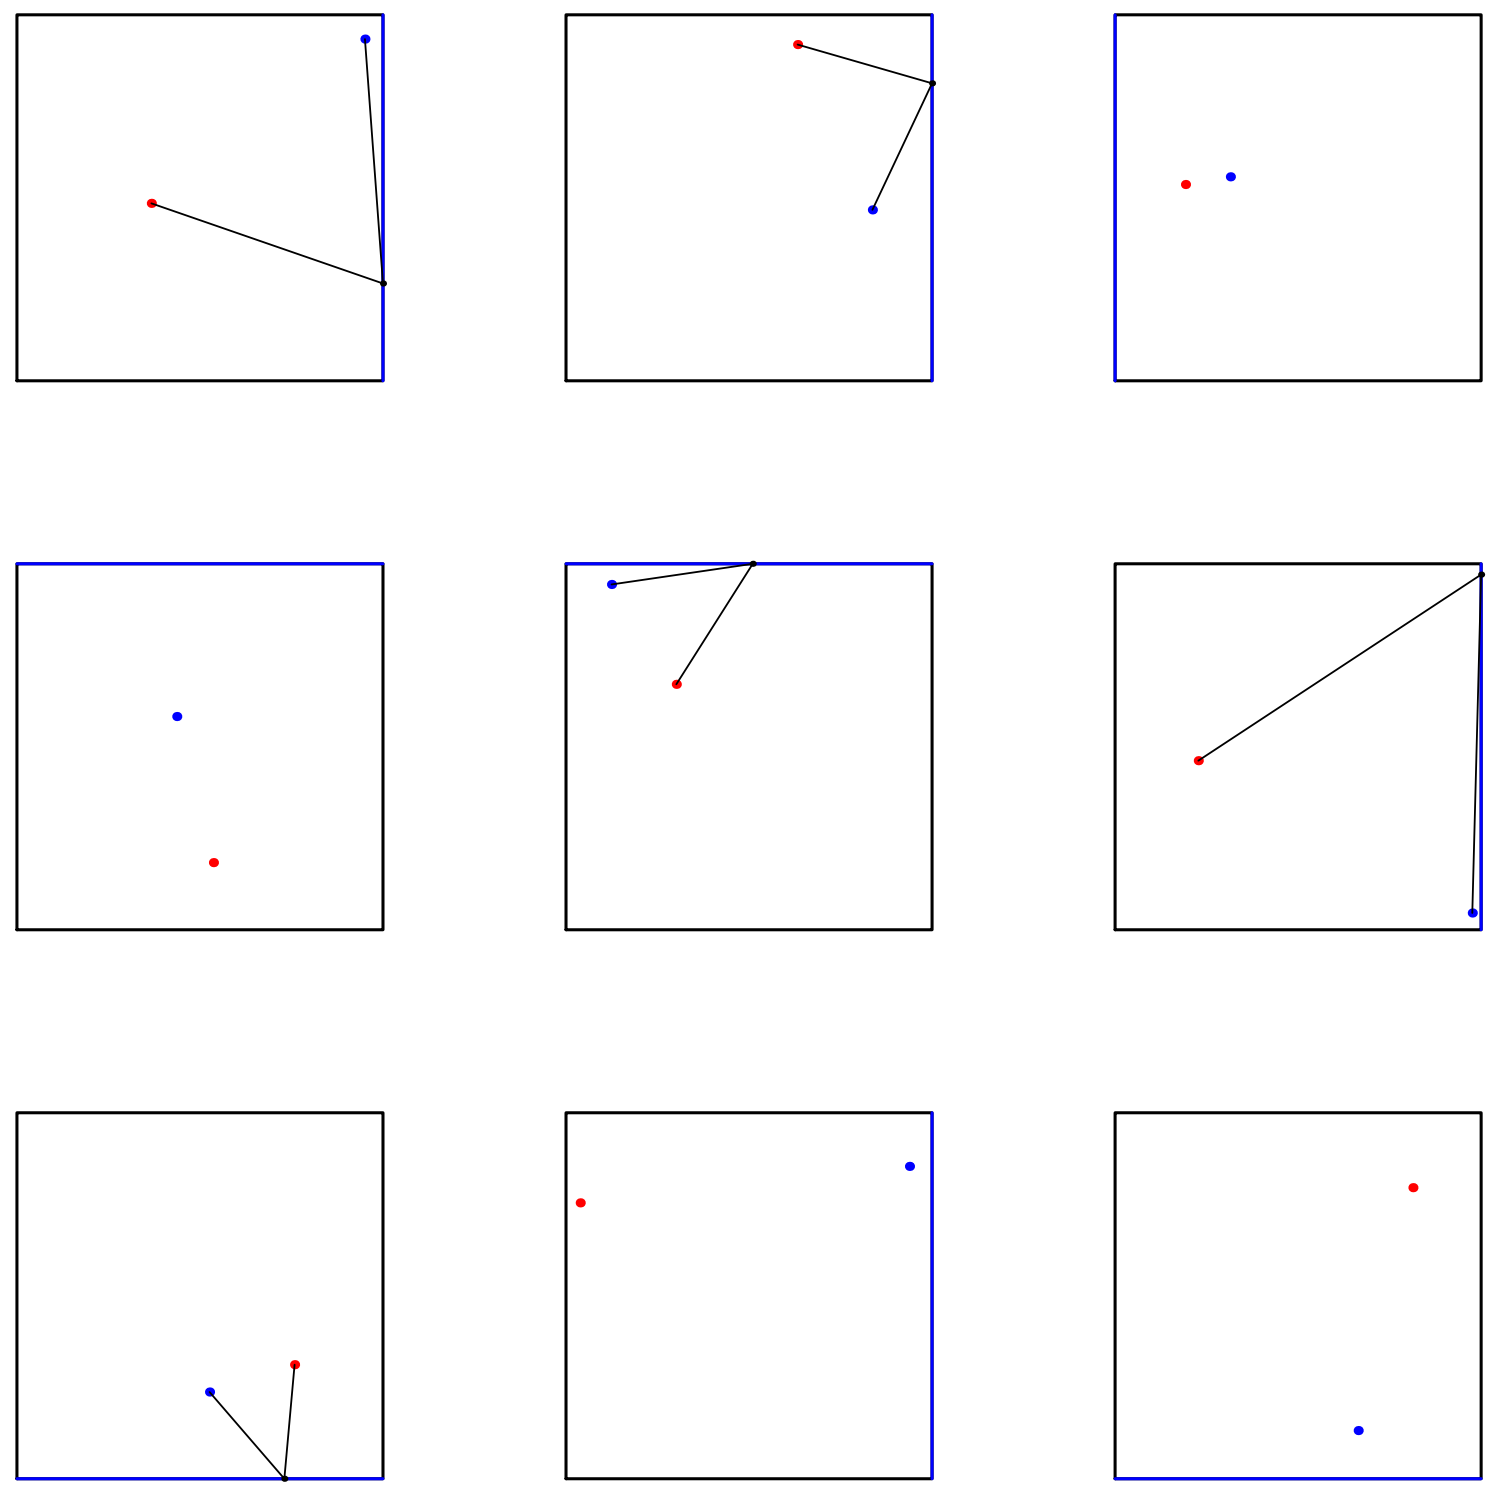

In [2]:
url='https://www.janestreet.com/puzzles/beside-the-point-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[14:23])))
display(Image('https://www.janestreet.com/puzzles/november-2024.png',width=200))

In [3]:
def overlap(x, y, d=1):
   
    r = (x**2+y**2)**0.5
    R = ((d-x)**2+y**2)**0.5
    
    part1 = r**2 * math.acos((d**2 + r**2 - R**2) / (2 * d * r))
    part2 = R**2 * math.acos((d**2 + R**2 - r**2) / (2 * d * R))
    part3 = 0.5 * math.sqrt((-d + r + R) * (d + r - R) * (d - r + R) * (d + r + R))
    
    return part1 + part2 - part3

region = lambda y,x : (pi/4)*(x**2+y**2)+(pi/4)*((1-x)**2+y**2)-overlap(x,y) # remove half the overlap from both circles

result  = integrate.dblquad(region,0,0.5,0,lambda x:x)
print("Solution is {:.10f} with an error of".format(result[0]*8),result[1])

Solution is 0.4914075788 with an error of 2.4856438384661475e-15


In [4]:
url='https://www.janestreet.com/puzzles/beside-the-point-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[14:23])))

November 2024 : Solution Show Puzzle For our November puzzle you had to compute the probability that two ordered points,
randomly uniformly selected from a square, would have an equidistant point on the edge
closest to the first point in the pair. Given the first point, without loss of generality
uniformly selected from a lower triangular octant of the square outlined in black above,
the second point would need to be in the blue-shaded symmetric difference of two circles
centered at the bottom vertices of the square that pass through the first point. The precision requested for the answer meant an analytical solution likely would be
required. Below the diagram is an integral expressing the total area of these blue-shaded
regions, which comes to (1 + 2π - ln(4))/12 , or approximately 0.4914075788… Congrats to the November solvers that computed the tricky probability! Who We Are